In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row', 500)
pd.set_option('display.max_colwidth', -1)

# Read file

In [58]:
import mdfreader 

fileName = "C:\\Users\\bnguitto\\Desktop\\ECU\\drivingCycle00\\00_drivingCycle00.dat"

def read_data(fileName):
    # read data from a mdf file
    # and print value for every key
    raw_dict = mdfreader.Mdf(fileName)
    for key in raw_dict.keys():
        print(key)
        #print(raw_dict[key]['description'])
        #print(raw_dict[key])
        #print(type(raw_dict[key]['data']))
        #print(raw_dict[key]['data'])
    return raw_dict

dict = read_data(fileName)

time
AirCtl_tEGRVlvLPUs_r32
AirCtl_mDesVal6EOM0_mp
ASMod_stMonBits
AirCtl_dmEGRLPDes
ASMod_pExhMnf
AirCtl_mDesValOfs
Rail_pSetPointAPSCor2Prs_mp
AirCtl_qDesVal_mp
InjCrv_phiPiI1ATSCorPrs_mp
CAClg_tDesVal
AirCtl_mDesATSCorEOM0_mp
CHdT_t
AirCtl_mHiLoadEGRCorrnBasEOM0_mp
AirCtl_facDesBas
ChrSet_rEgrO2MaxCalcn_mp
ASMod_tIntMnfDs
Exh_tPFltUs
InjCrv_qPiI1ATSCorPrs_mp
PFltLd_mSotMeas
AirCtl_stAirCtlBits
AirCtl_mDesBasEOM0
PthLead_trqInrLead
LSU_rO2Adap_[0]
AirCtl_mDesAPSCor2EOM0_mp
PCR_rGov
WaPmp_st
Air_tEGRClrLPDs
AirCtl_arEGRDesAdap_mp
AirCtl_rFrctLPDesVal2EOM0_mp
AirCtl_rFrctLPDesVal6EOM0_mp
AirSys_tFld_[7]
AirCtl_facVolEff
ASMod_tEGRLPDs_r32
Exh_tOxiCatUsB2
InjCrv_phiMI1APSCorPrs_mp
EISGov_trq
AirCtl_mDesValEOM0
AirCtl_trqDesVal_mp
InjCrv_qPoI2APSCorPrs_mp
ASMod_pIndVolDfl
AirCtl_mDesFQSCor2EOM0_mp
InjCrv_phiPoI2ATSCorPrs_mp
AirCtl_mDesAPSCor1EOM0_mp
Rail_pSetPointATSCor1Prs_mp
AirCtl_mDesVal7EOM0_mp
Rail_stCPC
AirCtl_dmEGRLPDs
AirCtl_rFrctLPDesVal5EOM0_mp
Exh_tTrbnUs
InjCrv_phiPiI1APSCor

In [5]:
# Convert the dict to a pandas dataframe
def toDataframe(dic,time):
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    for key in dic.keys():
        if (dic[key]['master'] == time):
            df1[key] = dic[key]['data']
            df2[key] = [dic[key]['description'],dic[key]['unit']]
    return df1, df2 

df1,df2 = toDataframe(dict,'time')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9140 entries, 0 to 9139
Columns: 209 entries, time to AirCtl_stSrgLimActvDes
dtypes: float32(5), float64(156), int16(10), int8(3), uint16(18), uint32(5), uint8(12)
memory usage: 11.8 MB


# Statistics

#### Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3D6B77080>]],
      dtype=object)

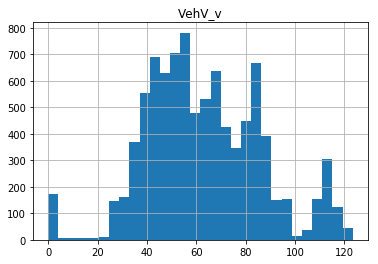

In [41]:
# Column histogram
df1.hist('VehV_v',bins = 30)

Text(0, 0.5, 'Average engine speed of one cylinder segment')

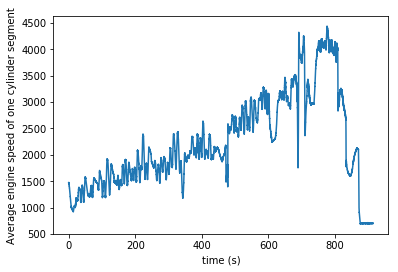

In [20]:
# Plot values over time
plt.plot(df1['time_2'],df1['Epm_nEng'])
plt.xlabel('time (s)')
plt.ylabel('Average engine speed of one cylinder segment')

#### Correlations

In [59]:
# Compute correlation matrix
corr = df1.corr()

# Find correlation pairs from correlation matrix
pairs = corr.abs().unstack().sort_values(ascending=False).drop_duplicates()

# Keep values above a high enough threshold
pairs = pairs.where(pairs>0.95).dropna()
pairs

AirCtl_stSrgLimActvDes        AirCtl_stSrgLimActvDes           1.000000
AirCtl_stAirCtlBits           AirCtl_stMonBits                 1.000000
PCR_tEngDesVal_mp             CHdT_tClntMod                    0.999996
AirCtl_mDesVal6EOM0_mp        AirCtl_mDesVal1EOM0_mp           0.999990
AirCtl_trqDesVal_mp           PthLead_trqInrLead               0.999939
ASMod_tEGRLPDs_r32            AirCtl_tEGRVlvLPUs_r32           0.999823
LSU_rO2Adap_[0]               LSU_rO2Act_[0]                   0.999468
PFltLd_resFlwFlt              PFltLd_mSotMeas                  0.999396
AirCtl_mDesVal7EOM0_mp        AirCtl_mDesValEOM0               0.999345
AirCtl_mDesBasEOM0            AirCtl_mDesVal9EOM0_mp           0.999322
ASMod_tCmprUsB1               AirSys_tFld_[7]                  0.999083
Air_pCACDs                    AirCtl_facPresSrgDes_mp          0.999054
RailP_pFlt                    Rail_pSetPoint                   0.998781
Air_tSensTEGRClrLPDs          Air_tEGRClrLPDs                  0

Text(0, 0.5, 'Actual percent engine torque')

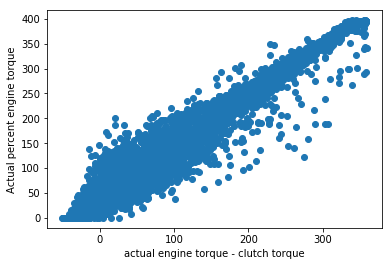

In [7]:
# Visualize correlation
plt.scatter(df1['ActMod_trqClth'],df1['PthLead_trqInrCurr'])
plt.xlabel('actual engine torque - clutch torque')
plt.ylabel('Actual percent engine torque')

In [14]:
print(df2['Epm_nEng'])
print(df2['PthLead_trqInrCurr'])

0    Average engine speed of one cylinder segment
1    rpm                                         
Name: Epm_nEng, dtype: object
0    Actual percent engine torque
1    Nm                          
Name: PthLead_trqInrCurr, dtype: object


# Channel selection

In [105]:
# Sample every 100th value
df3 = df1[df1.index % 100 == 0]

In [30]:
# Select only the columns we understand
channelList = ['FlSys_volFlPlausChkd','BattU_u','PFltPOp_vFlt','PthLead_trqInrCurr','CoETS_trqInrLim','ActMod_trqClth','EngPrt_trqLim','VehV_v','InjSys_qTot','Epm_nEng','PthSet_trqInrSet']

def selectChannels(dic,channelList):
    newDic = {}
    keys = dic.keys()
    times = []
    for channel in channelList:
        if (channel in keys):
            times.append(dic[channel]['master'])
    times = list(dict.fromkeys(times))
    for time in times:
        newDic[time] = dic[time]
    for channel in channelList:
        if (channel in keys):
            newDic[channel] = dic[channel]
    return newDic

newDict = selectChannels(dict,channelList)

In [4]:
# Make an aproximation where each captor not associated with the more precise clock are associated to the nearest value of time for each value
# input : mdfreader.Mdf, dic
# output : pandas.Dataframe, df, dfbis
def sum_up_time(dic) :
    #Fist, I choose the time that I will keep
    df = pd.DataFrame()
    dfbis = pd.DataFrame()
    time_list = find_time_s(dic)
    time_select = time_list[0][0]
    mini = time_list[0][1]
    for time in time_list :
        if time[1] < mini and time[1] > 1000 :
            time_select,mini = time[0],time[1]
    time_values = dic[time_select]['data']
    #Secondly, we need to built the two final dataframe
    for key in dic.keys():
        if (dic[key]['master'] == time_select): #this captor is already associate with the good time
            if key[0:4] != 'time' :
                df[key] = dic[key]['data']
                dfbis[key] = [dic[key]['description'],dic[key]['unit']]
            else :
                df['time'] = dic[key]['data']
                dfbis['time'] = [dic[key]['description'],dic[key]['unit']]
        elif key[0:4] == 'time' or key[0] == '$' : # We ignored other time
            None
        else : #We studied a captor with an other time 
            time_studied = dic[dic[key]['master']]['data']
            capt_studied = dic[key]['data']
            result =[[],[]]
            const = [find_nearest(time_values,time_studied[0]),capt_studied[0]]
            for i in range(1,len(time_studied)) :
                nearest = find_nearest(time_values,time_studied[i])
                if nearest == const[0] :
                    const.append(capt_studied[i])
                else : 
                    result[0].append(sum(const[1:len(const)])/(len(const)-1))
                    result[1].append(const[0])
                    const = [nearest,capt_studied[i]]
            result[0].append(sum(const[1:len(const)])/(len(const)-1))
            result[1].append(const[0])
            # We create the compatible array to write it in our dataframe
            array = np.zeros(len(time_values))
            array.fill(np.nan)
            continuer = True
            t1,t2 = 0,0
            while continuer :
                if time_values[t1] == result[1][t2]:
                    array[t1] = result[0][t2]
                    t1 += 1
                    t2 += 1
                elif time_values[t1] < result[1][t2] :
                    t1 += 1
                else :
                    t2 += 1
                if t1 == len(time_values) or t2 == len(result[1]) :
                    continuer = False
            df[key] = array
            dfbis[key] = [dic[key]['description'],dic[key]['unit']]
        print(key + ' done')
    cols = df.columns.tolist()
    cols.remove('time')
    cols = ['time'] + cols
    df = df[cols]
    return df, dfbis

# Find all key which correspond to time values and give their number of values
# input : mdfreader.Mdf, dic
# output : list, time_list
def find_time_s(dic) :
    time_list = []
    for key in dic.keys():
         if (dic[key]['unit'] == 's') and (dic[key]['description'] == ''):
             time_list.append([key,dic[key]['data'].size])
    return time_list

# Find the nearest value of value in array
# input : numpy.array, array
#         scalar, value
# output : the nearest value
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

In [44]:
fileNames0 = ['drivingCycle00\\00_drivingCycle00.dat','drivingCycle00\\01_drivingCycle00.dat','drivingCycle00\\02_drivingCycle00.dat','drivingCycle00\\03_drivingCycle00.dat','drivingCycle00\\04_drivingCycle00.dat','drivingCycle00\\05_drivingCycle00.dat','drivingCycle00\\06_drivingCycle00.dat','drivingCycle00\\07_drivingCycle00.dat','drivingCycle00\\08_drivingCycle00.dat','drivingCycle00\\09_drivingCycle00.dat','drivingCycle00\\10_drivingCycle00.dat','drivingCycle00\\11_drivingCycle00.dat','drivingCycle00\\12_drivingCycle00.dat']
fileNames1 = ['drivingCycle01\\00_drivingCycle01.dat','drivingCycle01\\01_drivingCycle01.dat','drivingCycle01\\02_drivingCycle01.dat','drivingCycle01\\03_drivingCycle01.dat','drivingCycle01\\04_drivingCycle01.dat','drivingCycle01\\05_drivingCycle01.dat','drivingCycle01\\06_drivingCycle01.dat','drivingCycle01\\07_drivingCycle01.dat','drivingCycle01\\08_drivingCycle01.dat','drivingCycle01\\09_drivingCycle01.dat','drivingCycle01\\10_drivingCycle01.dat']
fileNames2 = ['drivingCycle02\\00_drivingCycle02.dat','drivingCycle02\\01_drivingCycle02.dat','drivingCycle02\\02_drivingCycle02.dat','drivingCycle02\\03_drivingCycle02.dat','drivingCycle02\\04_drivingCycle02.dat','drivingCycle02\\05_drivingCycle02.dat','drivingCycle02\\06_drivingCycle02.dat','drivingCycle02\\07_drivingCycle02.dat','drivingCycle02\\08_drivingCycle02.dat','drivingCycle02\\09_drivingCycle02.dat','drivingCycle02\\10_drivingCycle02.dat','drivingCycle02\\11_drivingCycle02.dat','drivingCycle02\\12_drivingCycle02.dat','drivingCycle02\\13_drivingCycle02.dat','drivingCycle02\\14_drivingCycle02.dat','drivingCycle02\\15_drivingCycle02.dat','drivingCycle02\\16_drivingCycle02.dat','drivingCycle02\\17_drivingCycle02.dat','drivingCycle02\\18_drivingCycle02.dat']
fileNames3 = ['drivingCycle03\\00_drivingCycle03.dat','drivingCycle03\\01_drivingCycle03.dat','drivingCycle03\\02_drivingCycle03.dat','drivingCycle03\\03_drivingCycle03.dat','drivingCycle03\\04_drivingCycle03.dat','drivingCycle03\\05_drivingCycle03.dat','drivingCycle03\\06_drivingCycle03.dat','drivingCycle03\\07_drivingCycle03.dat','drivingCycle03\\08_drivingCycle03.dat','drivingCycle03\\09_drivingCycle03.dat','drivingCycle03\\10_drivingCycle03.dat','drivingCycle03\\11_drivingCycle03.dat','drivingCycle03\\12_drivingCycle03.dat','drivingCycle03\\13_drivingCycle03.dat','drivingCycle03\\14_drivingCycle03.dat','drivingCycle03\\15_drivingCycle03.dat','drivingCycle03\\16_drivingCycle03.dat','drivingCycle03\\17_drivingCycle03.dat','drivingCycle03\\18_drivingCycle03.dat','drivingCycle03\\19_drivingCycle03.dat','drivingCycle03\\20_drivingCycle03.dat','drivingCycle03\\21_drivingCycle03.dat','drivingCycle03\\22_drivingCycle03.dat','drivingCycle03\\23_drivingCycle03.dat','drivingCycle03\\24_drivingCycle03.dat','drivingCycle03\\25_drivingCycle03.dat','drivingCycle03\\26_drivingCycle03.dat','drivingCycle03\\27_drivingCycle03.dat','drivingCycle03\\28_drivingCycle03.dat','drivingCycle03\\29_drivingCycle03.dat','drivingCycle03\\30_drivingCycle03.dat','drivingCycle03\\31_drivingCycle03.dat','drivingCycle03\\32_drivingCycle03.dat','drivingCycle03\\33_drivingCycle03.dat','drivingCycle03\\34_drivingCycle03.dat','drivingCycle03\\35_drivingCycle03.dat','drivingCycle03\\36_drivingCycle03.dat','drivingCycle03\\37_drivingCycle03.dat']
fileNames4 = ['drivingCycle04\\00_drivingCycle04.dat','drivingCycle04\\01_drivingCycle04.dat','drivingCycle04\\02_drivingCycle04.dat','drivingCycle04\\03_drivingCycle04.dat','drivingCycle04\\04_drivingCycle04.dat','drivingCycle04\\05_drivingCycle04.dat','drivingCycle04\\06_drivingCycle04.dat','drivingCycle04\\07_drivingCycle04.dat','drivingCycle04\\08_drivingCycle04.dat','drivingCycle04\\09_drivingCycle04.dat','drivingCycle04\\10_drivingCycle04.dat','drivingCycle04\\11_drivingCycle04.dat','drivingCycle04\\12_drivingCycle04.dat']

fileNames = fileNames0 + fileNames1 + fileNames2 + fileNames3 + fileNames4

occurences0 = {}
for name in fileNames0:
    file = "C:\\Users\\bnguitto\\Desktop\\ECU\\" + name
    dic = mdfreader.Mdf(file)

    keys = dic.keys()
    for key in keys:
        data = dic[key]['data']
        nbNan = np.count_nonzero(pd.isnull(data))
        nbNonZeros = np.count_nonzero(data)
        size = len(data)
        if (nbNan/size)<0.8 and (nbNonZeros/size)>0.8:
            if key in occurences0.keys():
                occurences0[key] += 1
            else:
                occurences0[key] = 1
    
    print(file + ' done')

C:\Users\bnguitto\Desktop\ECU\drivingCycle00\00_drivingCycle00.dat done


C:\Users\bnguitto\AppData\Local\Continuum\anaconda3\lib\site-packages\mdfreader\mdf3reader.py:182: RuntimeWarning: divide by zero encountered in true_divide
  / (conversion['P4'] * data * data + conversion['P5'] * data + conversion['P6'])


C:\Users\bnguitto\Desktop\ECU\drivingCycle00\01_drivingCycle00.dat done


C:\Users\bnguitto\AppData\Local\Continuum\anaconda3\lib\site-packages\mdfreader\mdf3reader.py:182: RuntimeWarning: divide by zero encountered in true_divide
  / (conversion['P4'] * data * data + conversion['P5'] * data + conversion['P6'])


C:\Users\bnguitto\Desktop\ECU\drivingCycle00\02_drivingCycle00.dat done


C:\Users\bnguitto\AppData\Local\Continuum\anaconda3\lib\site-packages\mdfreader\mdf3reader.py:182: RuntimeWarning: divide by zero encountered in true_divide
  / (conversion['P4'] * data * data + conversion['P5'] * data + conversion['P6'])


C:\Users\bnguitto\Desktop\ECU\drivingCycle00\03_drivingCycle00.dat done


C:\Users\bnguitto\AppData\Local\Continuum\anaconda3\lib\site-packages\mdfreader\mdf3reader.py:182: RuntimeWarning: divide by zero encountered in true_divide
  / (conversion['P4'] * data * data + conversion['P5'] * data + conversion['P6'])


C:\Users\bnguitto\Desktop\ECU\drivingCycle00\04_drivingCycle00.dat done


C:\Users\bnguitto\AppData\Local\Continuum\anaconda3\lib\site-packages\mdfreader\mdf3reader.py:182: RuntimeWarning: divide by zero encountered in true_divide
  / (conversion['P4'] * data * data + conversion['P5'] * data + conversion['P6'])


C:\Users\bnguitto\Desktop\ECU\drivingCycle00\05_drivingCycle00.dat done


C:\Users\bnguitto\AppData\Local\Continuum\anaconda3\lib\site-packages\mdfreader\mdf3reader.py:182: RuntimeWarning: divide by zero encountered in true_divide
  / (conversion['P4'] * data * data + conversion['P5'] * data + conversion['P6'])


C:\Users\bnguitto\Desktop\ECU\drivingCycle00\06_drivingCycle00.dat done


C:\Users\bnguitto\AppData\Local\Continuum\anaconda3\lib\site-packages\mdfreader\mdf3reader.py:182: RuntimeWarning: divide by zero encountered in true_divide
  / (conversion['P4'] * data * data + conversion['P5'] * data + conversion['P6'])


C:\Users\bnguitto\Desktop\ECU\drivingCycle00\07_drivingCycle00.dat done
C:\Users\bnguitto\Desktop\ECU\drivingCycle00\08_drivingCycle00.dat done


C:\Users\bnguitto\AppData\Local\Continuum\anaconda3\lib\site-packages\mdfreader\mdf3reader.py:182: RuntimeWarning: divide by zero encountered in true_divide
  / (conversion['P4'] * data * data + conversion['P5'] * data + conversion['P6'])


C:\Users\bnguitto\Desktop\ECU\drivingCycle00\09_drivingCycle00.dat done


C:\Users\bnguitto\AppData\Local\Continuum\anaconda3\lib\site-packages\mdfreader\mdf3reader.py:182: RuntimeWarning: divide by zero encountered in true_divide
  / (conversion['P4'] * data * data + conversion['P5'] * data + conversion['P6'])


C:\Users\bnguitto\Desktop\ECU\drivingCycle00\10_drivingCycle00.dat done


C:\Users\bnguitto\AppData\Local\Continuum\anaconda3\lib\site-packages\mdfreader\mdf3reader.py:182: RuntimeWarning: divide by zero encountered in true_divide
  / (conversion['P4'] * data * data + conversion['P5'] * data + conversion['P6'])


C:\Users\bnguitto\Desktop\ECU\drivingCycle00\11_drivingCycle00.dat done
C:\Users\bnguitto\Desktop\ECU\drivingCycle00\12_drivingCycle00.dat done


C:\Users\bnguitto\AppData\Local\Continuum\anaconda3\lib\site-packages\mdfreader\mdf3reader.py:182: RuntimeWarning: divide by zero encountered in true_divide
  / (conversion['P4'] * data * data + conversion['P5'] * data + conversion['P6'])


In [51]:
minOccurences = [11,11,19,38,7]

remainingChannels0 = []
for key in occurences0.keys():
    if occurences0[key]>=minOccurences[0]:
        remainingChannels0.append(key)

remainingDicts0 = []
for name in fileNames0:
    file = "C:\\Users\\bnguitto\\Desktop\\ECU\\" + name
    dic = mdfreader.Mdf(file)
    remainingDicts0.append(selectChannels(dic,remainingChannels0))
remainingChannels0 = []

C:\Users\bnguitto\AppData\Local\Continuum\anaconda3\lib\site-packages\mdfreader\mdf3reader.py:182: RuntimeWarning: divide by zero encountered in true_divide
  / (conversion['P4'] * data * data + conversion['P5'] * data + conversion['P6'])
C:\Users\bnguitto\AppData\Local\Continuum\anaconda3\lib\site-packages\mdfreader\mdf3reader.py:182: RuntimeWarning: divide by zero encountered in true_divide
  / (conversion['P4'] * data * data + conversion['P5'] * data + conversion['P6'])
C:\Users\bnguitto\AppData\Local\Continuum\anaconda3\lib\site-packages\mdfreader\mdf3reader.py:182: RuntimeWarning: divide by zero encountered in true_divide
  / (conversion['P4'] * data * data + conversion['P5'] * data + conversion['P6'])
C:\Users\bnguitto\AppData\Local\Continuum\anaconda3\lib\site-packages\mdfreader\mdf3reader.py:182: RuntimeWarning: divide by zero encountered in true_divide
  / (conversion['P4'] * data * data + conversion['P5'] * data + conversion['P6'])
C:\Users\bnguitto\AppData\Local\Continuum\an

# Segmentation, transformation and feature extraction

Data scaling

In [66]:
# Min max scaling
def MinMaxScaler(df,columns):
    for column in columns:
        df[column] -= df[column].min()
        df[column] /= df[column].max()
        
def MinMaxScaler(df):
    df -= df.min()
    df /= df.max()
        
# Standard Scaling
def StandardScaler(df,columns):
    for column in columns:
        df[column] = (df[column]-df[column].mean())/df[column].std()
        
def StandardScaler(df):
    df = (df-df.mean())/df.std()

Segmentation and discretisation

In [98]:
# mean based discretisation
def AvgDiscretisation(df,segmentSize):
    newDf = pd.DataFrame(columns=df.columns)
    nbSegments = math.ceil(len(df)/segmentSize)
    segments = np.array_split(df,nbSegments)
    for i in range(len(segments)):
        newDf.loc[i] = segments[i].mean().values
    return newDf

# linear regression based discretisation
def RegDiscretisation(df,segmentSize):
    newDf = pd.DataFrame(columns=df.columns)
    nbSegments = math.ceil(len(df)/segmentSize)
    segments = np.array_split(df,nbSegments)
    for i in range(len(segments)):
        regression_model = LinearRegression()
        regression_model.fit(segments[i],segments[i]['time'])
        newDf.loc[i] = regression_model.coef_
    return newDf

In [55]:
a = np.array_split(df1.loc[0:10],3)

array([0.00016417, ..., 0.        ])

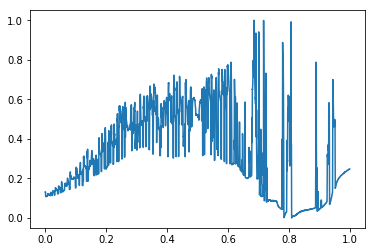

In [99]:
plt.plot(df1['time'],df1['AirCtl_tEGRVlvLPUs_r32'])

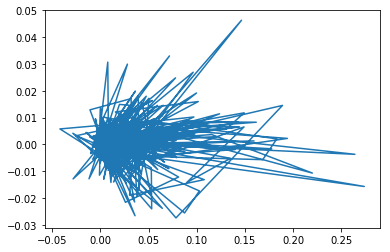

In [104]:
df11 = RegDiscretisation(df1.dropna(axis=1),10)
plt.plot(df11['time'],df11['AirCtl_tEGRVlvLPUs_r32'])

In [105]:
df11

time  AirCtl_tEGRVlvLPUs_r32  AirCtl_mDesVal6EOM0_mp  \
0   -6.823907e-05  2.850902e-05           -0.000092                 
1   -1.558755e-05 -9.517453e-06           -0.000006                 
2    1.032960e-05  3.462679e-04           -0.000147                 
3    3.268316e-04 -3.885520e-06           -0.000331                 
4    3.046885e-04 -5.926202e-06            0.000007                 
5    2.942724e-04  7.971447e-04           -0.000014                 
6   -2.014449e-04 -1.109838e-04           -0.000024                 
7   -1.090331e-05  2.301519e-05           -0.000002                 
8    3.594127e-05 -9.333214e-05            0.000069                 
9    4.768832e-05  2.017041e-05            0.000092                 
10  -6.003689e-05 -8.475328e-05           -0.000171                 
11   1.064070e-04  7.208828e-05            0.000043                 
12   7.653606e-05  1.739111e-04           -0.000064                 
13   1.317786e-04 -3.502024e-04            0.000377                 
14   1.329093e-04  8.275010e-05            0.000146                 
15  -4.906028e-04 -8.377750e-04            0.000304                 
16   1.306020e-03  6.875185e-05            0.000205                 
17   1.552455e-05 -1.529313e-04           -0.000155                 
18  -1.559425e-06  4.511241e-05            0.000045                 
19   1.123378e-03 -1.349209e-04            0.000619                 
20   3.488033e-04 -9.235312e-05           -0.000062                 
21   1.929644e-04  5.760783e-05            0.000327                 
22  -8.843482e-04 -7.220350e-05           -0.000077                 
23   4.820506e-05 -5.673383e-05            0.000010                 
24   3.202173e-05 -9.044744e-05            0.000034                 
25   1.047908e-04 -2.751418e-06            0.000077                 
26   1.069718e-04 -1.585695e-04            0.000089                 
27   1.134183e-03  9.794449e-04           -0.000780                 
28  -6.410489e-05  5.011962e-05            0.000024                 
29   2.689478e-04 -2.066518e-03           -0.000925                 
30  -4.943339e-05 -8.002664e-05            0.000141                 
31   7.476446e-05  4.961426e-05           -0.000016                 
32  -7.404811e-07 -7.008055e-05           -0.000010                 
33  -3.326080e-05 -5.337434e-05            0.000031                 
34   4.126815e-04 -4.854344e-04           -0.000095                 
35  -2.694089e-04 -9.133604e-05            0.000120                 
36   2.376517e-03  6.735364e-05            0.000082                 
37  -2.589506e-05  3.121273e-05           -0.000117                 
38  -2.926407e-04 -2.344401e-05            0.000480                 
39  -1.931997e-03  4.317632e-05            0.000205                 
40  -1.483691e-03  5.576233e-04            0.000098                 
41  -1.189297e-03  3.371626e-04           -0.000040                 
42   2.108775e-03 -1.690227e-04           -0.000284                 
43  -7.134180e-05 -1.588492e-04            0.000077                 
44   4.276928e-04  3.347678e-04            0.000022                 
45   1.250862e-03 -3.609125e-04            0.000172                 
46  -4.629401e-04  1.865919e-05            0.000031                 
47   2.541944e-04  2.744198e-04            0.000567                 
48  -3.559724e-04  6.566684e-05            0.000252                 
49   3.093306e-05  2.443840e-04           -0.000053                 
50   2.388721e-03  9.456195e-04            0.000215                 
51   2.555425e-03 -5.614214e-04           -0.000188                 
52   2.611214e-04  2.695053e-05           -0.000059                 
53   1.892799e-04 -4.118132e-05           -0.000219                 
54   5.120476e-04  3.218989e-04           -0.000294                 
55   1.881765e-04  3.640711e-04           -0.000280                 
56   2.698278e-04  8.590106e-04           -0.000326                 
57  -2.5177

In [92]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)

Slope: [[2.93655106]]


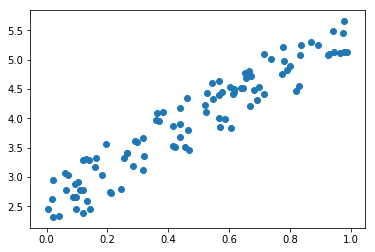

In [91]:
plt.scatter(x,y)